# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [240]:
# If on colab, uncomment the following lines
#doesn't work, please, check your links
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv 

--2021-03-21 18:36:42--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-03-21 18:36:43 ERROR 404: Not Found.



In [241]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [242]:
y_train[:30]

array(['saab', 'saab', 'opel', 'saab', 'opel', 'saab', 'bus', 'opel',
       'van', 'saab', 'saab', 'van', 'bus', 'van', 'opel', 'van', 'opel',
       'opel', 'saab', 'opel', 'opel', 'opel', 'saab', 'bus', 'saab',
       'van', 'saab', 'saab', 'opel', 'opel'], dtype=object)

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [243]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,335,109,54,103,205,63,11,222,30,25,175,229,720,213,71,6,14,187,200
1,367,82,37,59,134,63,7,135,51,18,128,151,264,143,82,11,24,179,185
2,802,89,44,80,191,66,6,162,40,20,143,189,396,180,66,13,11,194,199
3,148,90,43,72,172,59,8,154,42,19,144,174,360,158,61,15,9,203,209
4,826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
5,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
6,592,79,43,72,141,62,8,153,44,19,144,175,344,174,78,0,8,182,188
7,507,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198
8,262,89,40,60,131,56,6,118,56,17,137,143,209,153,65,10,8,193,199
9,459,98,42,90,192,61,9,178,37,21,144,189,480,138,61,3,8,199,208


Methods `describe` and `info` deliver some useful information.

In [244]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,417.513661,94.269581,45.025501,82.520947,170.797814,61.859745,8.595628,170.045537,40.677596,20.677596,148.273224,189.959927,447.158470,175.449909,72.169399,6.615665,12.655738,189.342441,196.051002
std,239.915052,8.346740,6.244654,16.019093,33.878016,8.151194,4.835285,34.124179,8.010934,2.658115,14.456265,32.604831,181.584255,33.103958,7.568814,4.977303,8.794899,6.237048,7.527634
min,0.000000,73.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,212.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,318.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,419.000000,93.000000,44.000000,80.000000,170.000000,61.000000,8.000000,157.000000,42.000000,20.000000,146.000000,180.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,619.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,202.000000,46.000000,23.000000,160.000000,219.000000,610.000000,199.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [245]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

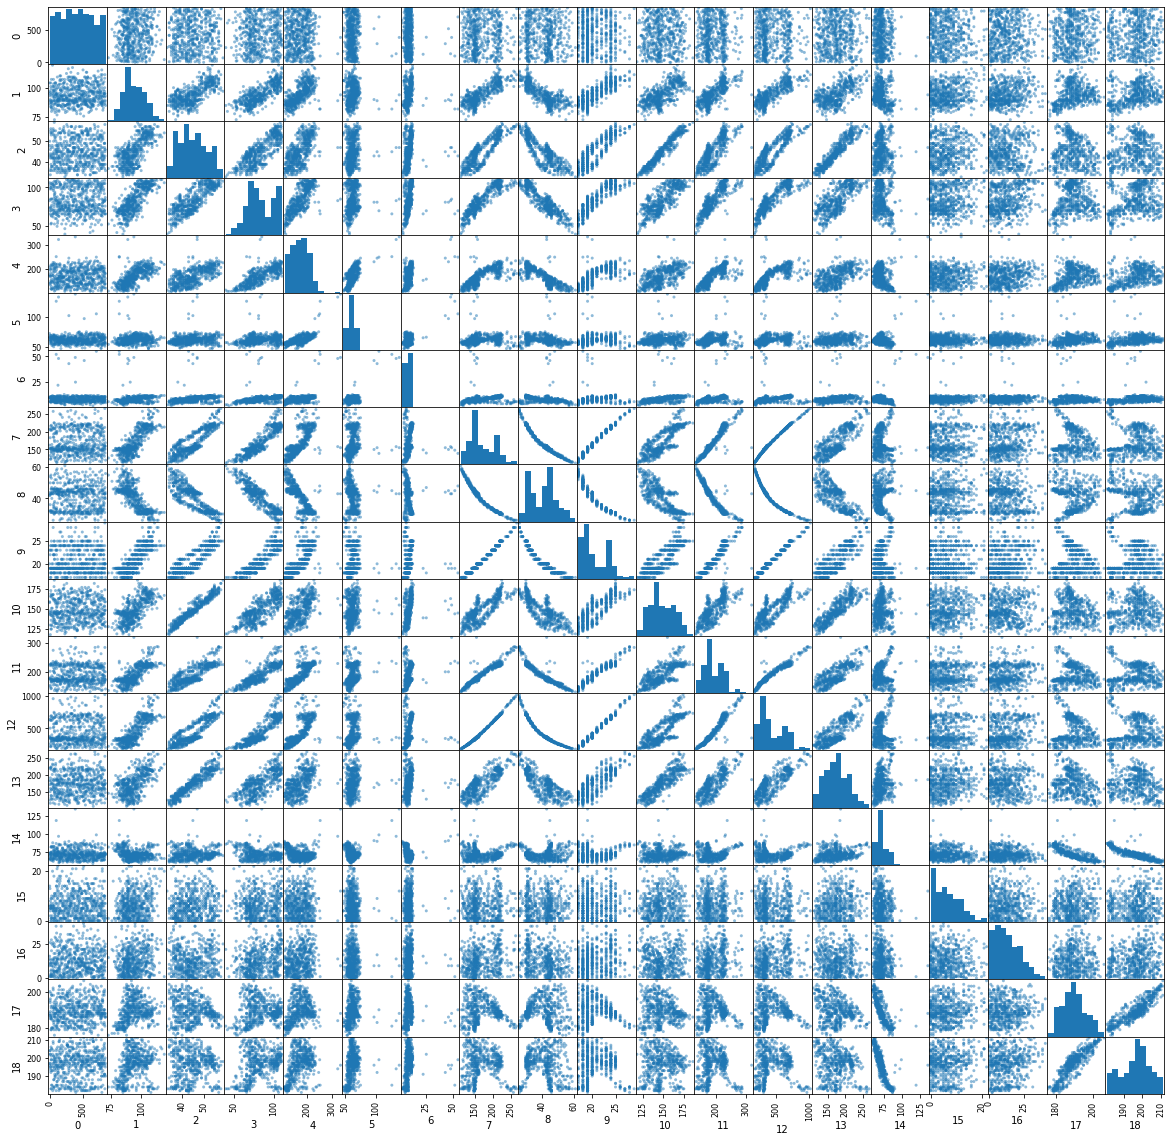

In [246]:
### YOUR CODE HERE
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
scatter_matrix(pd.DataFrame(X_train), alpha=0.5, figsize=(20, 20))
plt.show()
#Visualization of dependencies between features, also we can look at their scales and see that they are different.
#Some features are in the range of values ​​from 0 to 500, others from 0 to 20. Not good. Such difference can badly affect regularization,
#for example, models might perform worse on such data. Also unscaled data worse interpreted.

In [247]:
#We will scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_pd_scaled = pd.DataFrame(X_train_scaled)
X_train_pd_scaled.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.344242,1.766421,1.438460,1.279581,1.010489,0.140016,0.497709,1.523900,-1.334093,1.627600,1.850488,1.198463,1.503932,1.135343,-0.154643,-0.123807,0.152985,-0.375911,0.525079
1,-0.210740,-1.471325,-1.286352,-1.469646,-1.087176,0.140016,-0.330298,-1.027937,1.289715,-1.008248,-1.403662,-1.196002,-1.009589,-0.981137,1.300014,0.881669,1.291045,-1.659739,-1.469397
2,1.604055,-0.631910,-0.164370,-0.157515,0.596865,0.508396,-0.537299,-0.235987,-0.084661,-0.255148,-0.365104,-0.029468,-0.281991,0.137574,-0.815851,1.283859,-0.188433,0.747438,0.392114
3,-1.124396,-0.511993,-0.324653,-0.657374,0.035518,-0.351157,-0.123296,-0.470639,0.165225,-0.631698,-0.295866,-0.489942,-0.480427,-0.527605,-1.477059,1.686050,-0.416045,2.191744,1.721764
4,1.704182,0.087589,0.637045,0.592274,0.655954,0.017222,0.290707,0.233316,-0.459491,0.121401,0.396506,0.308213,0.170002,-0.134545,-1.080334,-0.928188,-1.440299,1.389352,1.322869
5,-1.733499,1.166838,0.797328,1.467029,1.128668,0.508396,0.290707,1.083928,-1.084207,0.874500,0.673455,1.014273,1.035403,1.346991,0.109840,1.484955,-0.416045,-0.215433,-0.006781
6,0.727947,-1.831075,-0.324653,-0.657374,-0.880364,0.017222,-0.123296,-0.499970,0.415112,-0.631698,-0.295866,-0.459244,-0.568621,-0.043839,0.771048,-1.330379,-0.529851,-1.178304,-1.070502
7,0.373332,-0.152244,-1.606918,-0.282480,-0.259928,-0.228364,-0.123296,-0.587965,0.540055,-0.631698,-1.611374,-0.551339,-0.640278,-1.162549,-0.683610,-0.928188,2.315299,0.266003,0.259149
8,-0.648794,-0.631910,-0.805503,-1.407164,-1.175810,-0.719537,-0.537299,-1.526572,1.914431,-1.384797,-0.780527,-1.441589,-1.312755,-0.678782,-0.948093,0.680574,-0.529851,0.586960,0.392114
9,0.173079,0.447339,-0.484936,0.467309,0.626410,-0.105571,0.083706,0.233316,-0.459491,0.121401,-0.295866,-0.029468,0.181026,-1.132314,-1.477059,-0.727093,-0.529851,1.549830,1.588799


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [248]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [249]:
cv = 10 #number of folds for cross-validation
linreg_classifier = LogisticRegression(multi_class='multinomial', solver='saga',tol=1e-3, max_iter=500)
param_grid = {
    'C':  [0.01, 0.05, 0.1, 0.5, 5, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'class_weight': ['balanced', None],
    'random_state': [0, None]
}
optimizer = GridSearchCV(linreg_classifier, param_grid, n_jobs=-1, cv=cv) # i will reuse this variable(and else) below, please, run cells consequently or you may get wrong results
optimizer.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 5, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [250]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

In [251]:
from scikitplot.metrics import plot_roc
def checkScore(X): 
  print(optimizer.best_params_)
  y_predicted = optimizer.best_estimator_.predict(X)
  print("Accuracy score: ", accuracy_score(y_test, y_predicted))
  print("F1 score(micro): ", f1_score(y_test, y_predicted, average = 'micro'))
  print("F1 score(weighted): ", f1_score(y_test, y_predicted, average = 'weighted'))
  plot_roc(y_test, optimizer.best_estimator_.predict_proba(X), figsize=(16,10))

{'C': 10, 'class_weight': None, 'penalty': 'l1', 'random_state': 0}
Accuracy score:  0.8013468013468014
F1 score(micro):  0.8013468013468014
F1 score(weighted):  0.7983584198181148


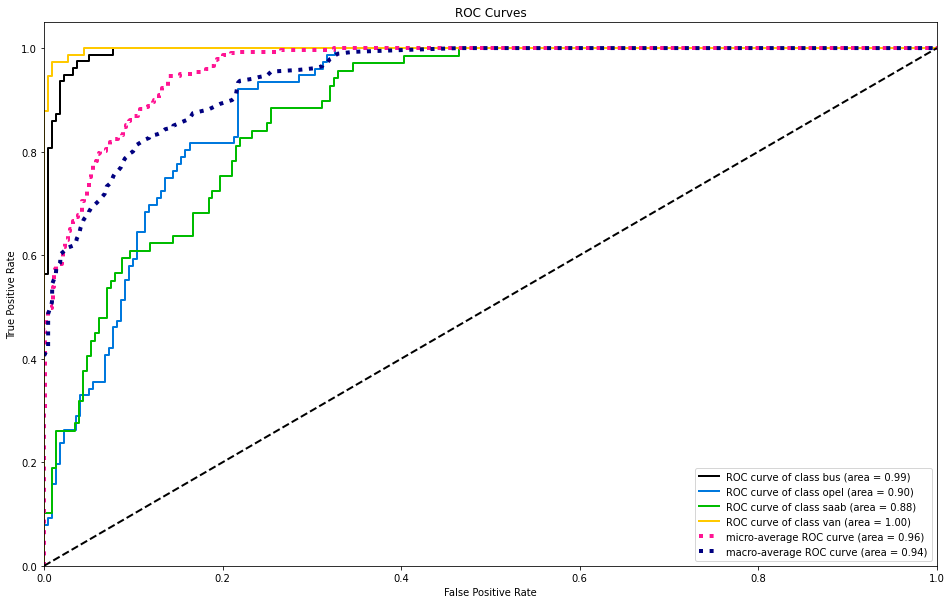

In [252]:
 checkScore(X_test_scaled)


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

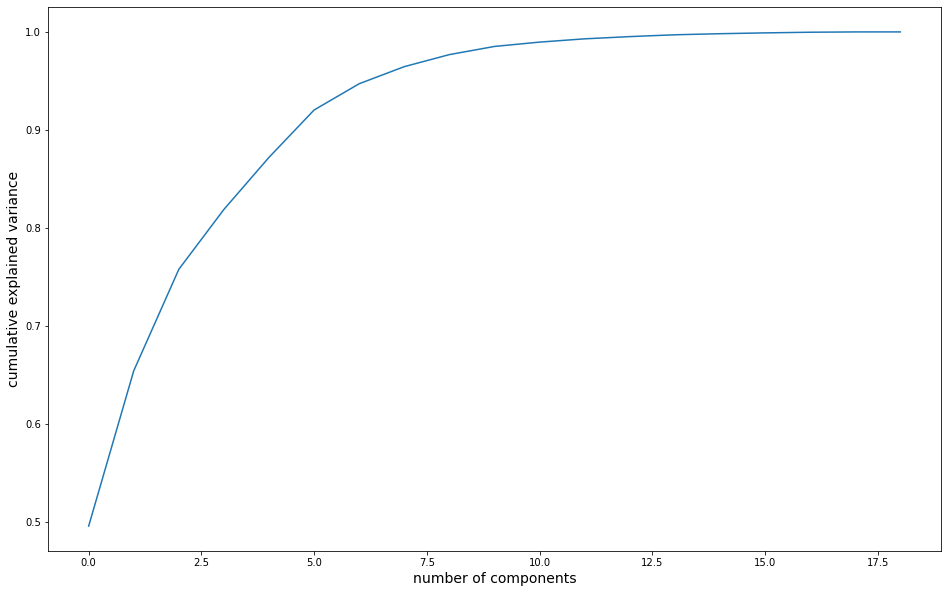

In [253]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA(19).fit(X_train_pd_scaled)
plt.figure( figsize=(16,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('cumulative explained variance', fontsize = 14)
plt.xlabel('number of components',fontsize = 14)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

$Answer:$ i think, 12 components is enough. Further increase in their number does not make sense, since they practically don't add information. Data normalization is necessary, otherwise features with a wide scatter will take all the attention. 


In [254]:
### YOUR CODE HERE
n_components = 12
pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)
PCA_X_train = pca.transform(X_train_scaled)
PCA_X_test = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None}
Accuracy score:  0.7407407407407407
F1 score(micro):  0.7407407407407407
F1 score(weighted):  0.731082560629137


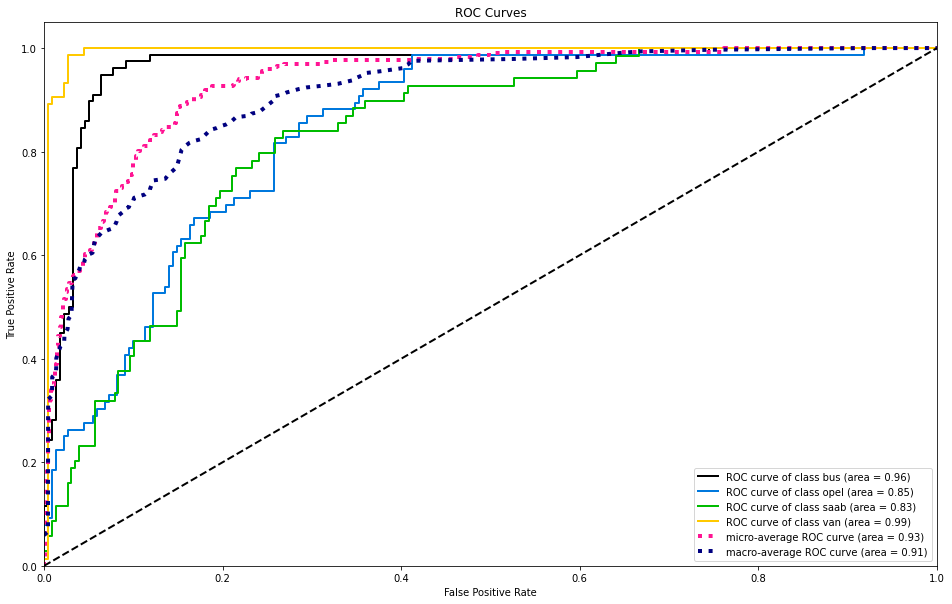

In [255]:
### YOUR CODE HERE
optimizer.fit(PCA_X_train, y_train)
checkScore(PCA_X_test)
logreg_best_classifier = optimizer.best_estimator_

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [256]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
dectree_classifier = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
param_grid = {
    'max_depth': np.arange(1, 500, 10),
    'random_state':[0, None],
    'class_weight': ['balanced', None]
}
dectree_optimizer = GridSearchCV(dectree_classifier, param_grid, n_jobs=-1, cv=cv)
dectree_optimizer.fit(PCA_X_train, y_train)
print(dectree_optimizer.best_params_)
dectree_best_classifier = optimizer.best_estimator_

{'class_weight': None, 'max_depth': 491, 'random_state': None}


{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None}
Accuracy score:  0.7407407407407407
F1 score(micro):  0.7407407407407407
F1 score(weighted):  0.731082560629137


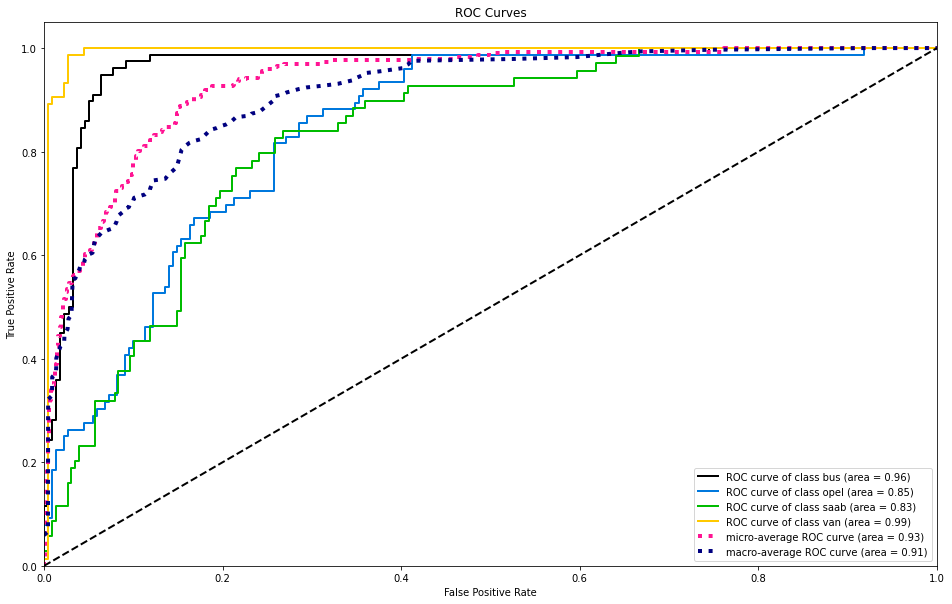

In [257]:
checkScore(PCA_X_test)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [258]:
# YOUR CODE HERE
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingClassifier

N_min = 2
N_max = 100
ensemble_size = np.arange(N_min, N_max, 5)
lg_accuracy_scores = []
dc_accuracy_scores = []
lg_f1_scores = []
dc_f1_scores= []
for n in range(N_min, N_max, 5):
  lonreg_bagging = BaggingClassifier(logreg_best_classifier, n_estimators = n,\
                                     ).fit(PCA_X_train, y_train)

  dectree_bagging =  BaggingClassifier(dectree_best_classifier, n_estimators = n,\
                                     ).fit(PCA_X_train, y_train)
  y_preds = [lonreg_bagging.predict(PCA_X_test), dectree_bagging.predict(PCA_X_test)]

  lg_accuracy_scores.append(accuracy_score(y_test, y_preds[0]))
  dc_accuracy_scores.append(accuracy_score(y_test, y_preds[1]))
  
  lg_f1_scores.append(f1_score(y_test, y_preds[0], average = 'weighted'))
  dc_f1_scores.append(f1_score(y_test, y_preds[1], average = 'weighted'))

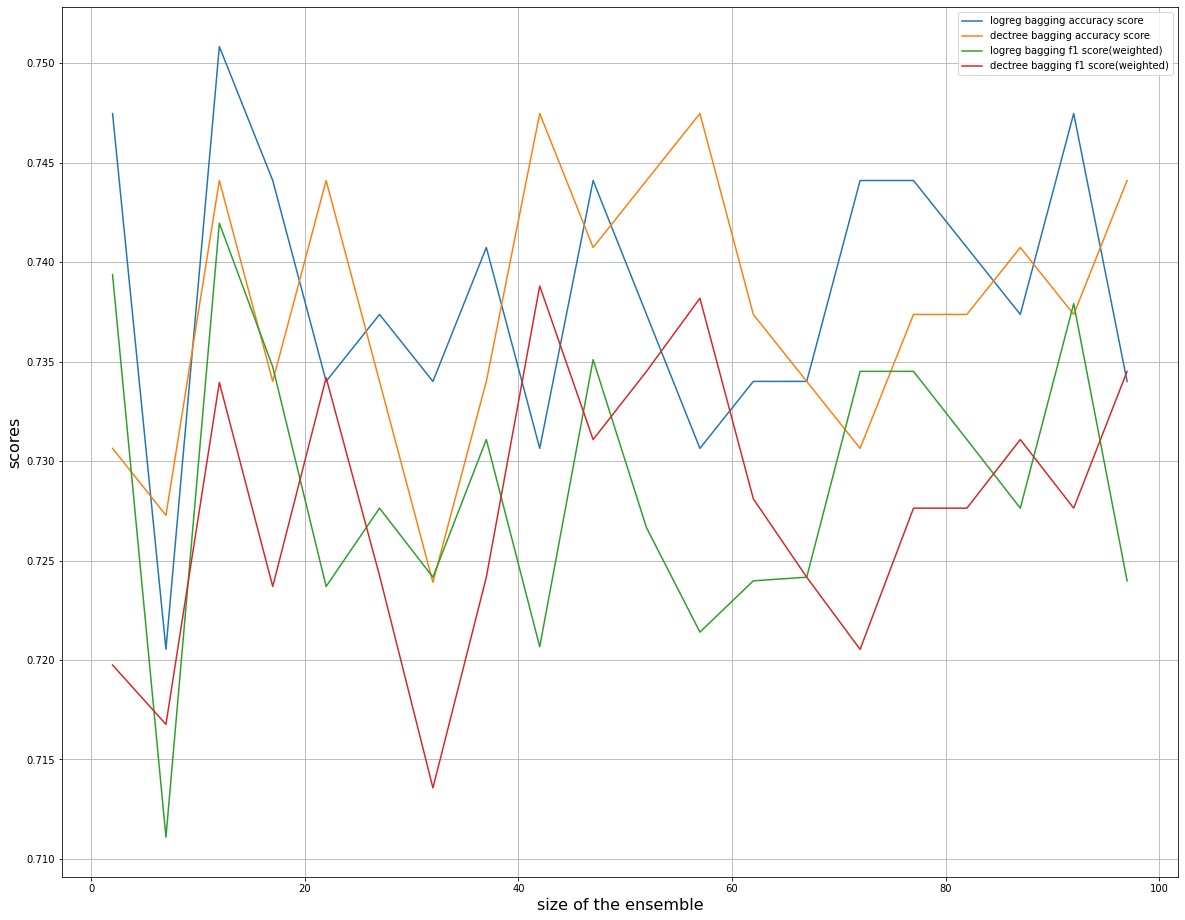

In [259]:
plt.figure(figsize=(20,16))
plt.plot(N, lg_accuracy_scores, label = "logreg bagging accuracy score")
plt.plot(N, dc_accuracy_scores, label = "dectree bagging accuracy score")
plt.plot(N, lg_f1_scores, label = "logreg bagging f1 score(weighted)")
plt.plot(N, dc_f1_scores, label = "dectree bagging f1 score(weighted)")
plt.xlabel("size of the ensemble", fontsize  = 16)
plt.ylabel("scores", fontsize  = 16)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [260]:
print("The optimal number of algorithms is ", N[np.argmax(lg_accuracy_scores)], "for  logistic regressions and ",  N[np.argmax(dc_accuracy_scores)], "for decision trees.")

The optimal number of algorithms is  12 for  logistic regressions and  42 for decision trees.


I don't think the hyperparameters for the decision trees i found in 2.5 are optimal, because in ensembles it makes more sense to take separately retrained trees(e.g. make them deeper), but in 2.5 the tree is only one, and it's better to avoid such an effect.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

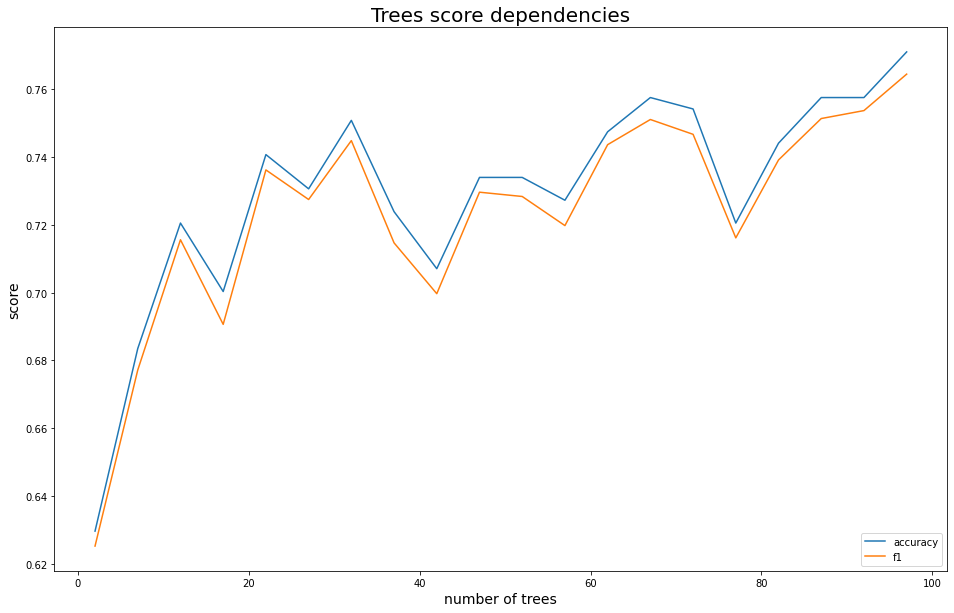

The optimal number of trees is  97 .


In [261]:
from sklearn.ensemble import RandomForestClassifier
def plot_score():
    N = np.arange(N_min, N_max, 5)
    accuracy = []
    f1 = []
    for n in N:
        randforest_classifier = RandomForestClassifier(n_estimators=n, n_jobs = -1)
        randforest_classifier.fit(PCA_X_train, y_train)
        accuracy.append(accuracy_score(y_test, randforest_classifier.predict(PCA_X_test)))
        f1.append(f1_score(y_test, randforest_classifier.predict(PCA_X_test), average = 'weighted'))

    plt.figure(figsize=(16, 10))
    plt.plot(N, accuracy, label = 'accuracy')
    plt.plot(N, f1, label = "f1")
    plt.xlabel("number of trees", fontsize = 14)
    plt.ylabel("score", fontsize = 14)
    plt.title("Trees score dependencies", fontsize = 20)
    plt.legend(loc = 'lower right')
    plt.show()
    print("The optimal number of trees is ", N[np.argmax(accuracy)], ".")
plot_score()


Yes, it's different from previous optimal numbers. Maybe because random forest use also feature bootstrap and trees retraining.

In [262]:
randforest_best_classifier = RandomForestClassifier(n_estimators=92, n_jobs = -1)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [296]:
# # YOUR CODE HERE
from sklearn.model_selection import KFold

kf= KFold(n_splits = 10)
X = np.array([]).reshape(0,PCA_X_train.shape[1])
y = np.array([])
data_size = []
logreg_accuracy = []
logreg_f1_weighted = []
dectree_accuracy = []
dectree_f1_weighted = []
rf_accuracy = []
rf_f1_weighted = []

def getScore(accuracy, f1, model):
  model.fit(X, y)
  accuracy.append(accuracy_score(y_test, model.predict(PCA_X_test)))
  f1.append(f1_score(y_test, model.predict(PCA_X_test), average = 'weighted'))

In [297]:
def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
   
    for batch_start in np.arange((len(X)//batch_size)* batch_size, step = batch_size):
      yield (X[perm][batch_start:batch_start+batch_size], y[perm][batch_start:batch_start+batch_size])

for X_b, y_b in generate_batches(PCA_X_train, y_train, len(PCA_X_train)//10):
  X = np.concatenate((X, X_b))
  y = np.concatenate((y, y_b))
  data_size.append(len(X))
  print(data_size)
  getScore(logreg_accuracy, logreg_f1_weighted, logreg_best_classifier)
  getScore(dectree_accuracy, dectree_f1_weighted, dectree_best_classifier)
  getScore(rf_accuracy, rf_f1_weighted, randforest_best_classifier)

[54]
[54, 108]
[54, 108, 162]
[54, 108, 162, 216]
[54, 108, 162, 216, 270]
[54, 108, 162, 216, 270, 324]
[54, 108, 162, 216, 270, 324, 378]
[54, 108, 162, 216, 270, 324, 378, 432]
[54, 108, 162, 216, 270, 324, 378, 432, 486]
[54, 108, 162, 216, 270, 324, 378, 432, 486, 540]


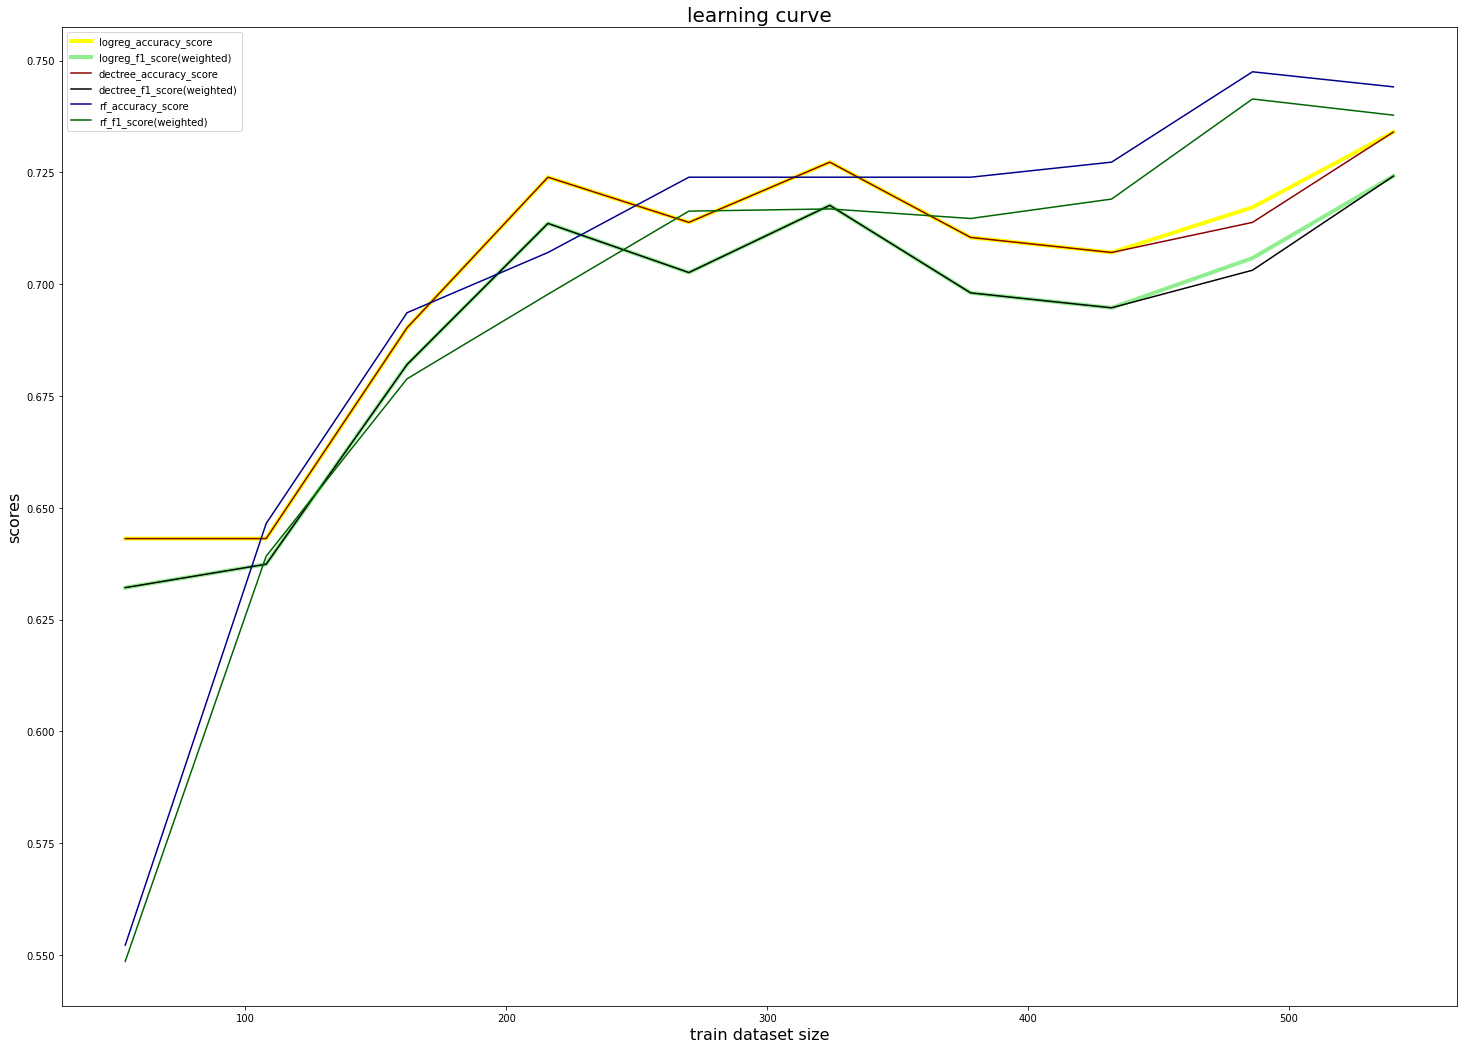

In [298]:
plt.figure(figsize=(25,18))
plt.plot(data_size, logreg_accuracy, label = 'logreg_accuracy_score', color = 'yellow', linewidth =4)
plt.plot(data_size, logreg_f1_weighted, label = 'logreg_f1_score(weighted)', color = 'lightgreen', linewidth =4)
plt.plot(data_size, dectree_accuracy, label = 'dectree_accuracy_score', color = 'darkred')
plt.plot(data_size, dectree_f1_weighted, label = 'dectree_f1_score(weighted)', color = 'black')
plt.plot(data_size, rf_accuracy, label = 'rf_accuracy_score', color = 'darkblue')
plt.plot(data_size, rf_f1_weighted, label = 'rf_f1_score(weighted)', color ='darkgreen')
plt.title('learning curve', fontsize  = 20)
plt.xlabel('train dataset size', fontsize  = 16 )
plt.ylabel('scores', fontsize  = 16 )
plt.legend(loc ='best')
plt.show()

**Conclusions**:
Randforest performs badly on very small datasets, also logistic regression and decision tree results very similar. The larger the dataset, the more objects of small classes are in it, therefore, a model can learn to recognize them better than before, but at first moment accuracy should decrease. Maybe that's why the charts fall into the "pits". 
As the number of samples increases, the quality increases up, but to a certain point, and then and doesn't change significantly. Maybe it's not obvious on this plot. 